- https://www.kaggle.com/bugraokcu/cnn-with-keras

In [2]:
import numpy as np
import pandas as pd

from subprocess import check_output
print(check_output(['ls', './data']).decode('utf8'))

fashion-mnist_test.csv
fashion-mnist_train.csv
t10k-images-idx3-ubyte
t10k-labels-idx1-ubyte
train-images-idx3-ubyte
train-labels-idx1-ubyte



In [46]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

data_train = pd.read_csv('./data/fashion-mnist_train.csv')
data_test = pd.read_csv('./data/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [54]:
# exclude label column
X = np.array(data_train.iloc[:, 1:])
# label to categorical. e.g. 2 -> [0, 0, 1, 0, 0, 0, ...]
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here we split validation data to optimiza classifier during training
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

# (data_num, 28*28) -> (data_num, 28, 28)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

In [68]:
batch_size = 256
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(
    32,
    kernel_size=(3, 3),
    activation='relu',
    kernel_initializer='he_normal',
    input_shape=input_shape
))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [70]:
model_hist = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs, verbose=1,
    validation_data=(X_val, y_val)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 32s 661us/step - loss: 0.8561 - acc: 0.6806 - val_loss: 0.5128 - val_acc: 0.8063
Epoch 2/10
48000/48000 [==============================] - 31s 653us/step - loss: 0.5233 - acc: 0.8034 - val_loss: 0.4215 - val_acc: 0.8468
Epoch 3/10
48000/48000 [==============================] - 31s 655us/step - loss: 0.4531 - acc: 0.8331 - val_loss: 0.3846 - val_acc: 0.8622
Epoch 4/10
48000/48000 [==============================] - 31s 639us/step - loss: 0.4064 - acc: 0.8514 - val_loss: 0.3426 - val_acc: 0.8777
Epoch 5/10
48000/48000 [==============================] - 31s 642us/step - loss: 0.3742 - acc: 0.8626 - val_loss: 0.3130 - val_acc: 0.8850
Epoch 6/10
48000/48000 [==============================] - 31s 655us/step - loss: 0.3505 - acc: 0.8725 - val_loss: 0.3210 - val_acc: 0.8780
Epoch 7/10
48000/48000 [==============================] - 31s 643us/step - loss: 0.3387 - acc: 0.8769 - val_loss: 0.

In [71]:
score = model.evaluate(X_test, y_test, verbose=0)

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

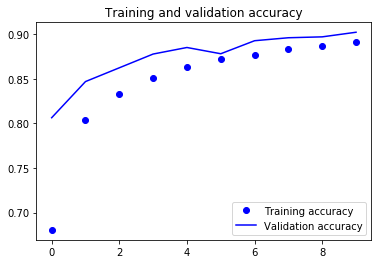

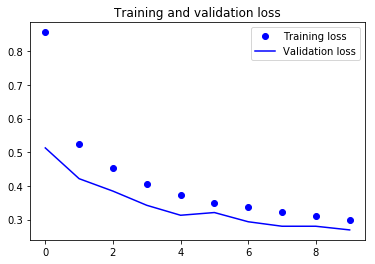

In [74]:
accuracy = model_hist.history['acc']
val_accuracy = model_hist.history['val_acc']
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.249871012449
Test accuracy: 0.9036


### Classification Report
We can summarize the performance of our classifier as follows

In [121]:
predicted_classes = model.predict_classes(X_test)
y_true = data_test.iloc[:, 0]

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [113]:
from sklearn.metrics import classification_report
target_names = ['Class {}'.format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.85      0.85      0.85      1000
    Class 1       0.99      0.98      0.98      1000
    Class 2       0.90      0.81      0.85      1000
    Class 3       0.91      0.92      0.92      1000
    Class 4       0.81      0.89      0.85      1000
    Class 5       0.96      0.98      0.97      1000
    Class 6       0.72      0.72      0.72      1000
    Class 7       0.96      0.95      0.95      1000
    Class 8       0.99      0.97      0.98      1000
    Class 9       0.96      0.97      0.96      1000

avg / total       0.90      0.90      0.90     10000



It's apparent that our classifier is underperforming for class 6 in terms of both precision and recall. For class 2, classifier is slightly lacking precision whereas it is slightly lacking recall (i.e. missed) for class 4.

Perhaps we would gain more insight after visualizing the correct and incorrect predictions.

Here is a subset of correctly predicted classes.

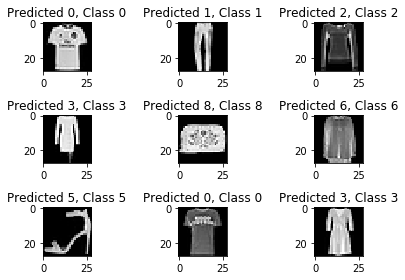

In [122]:
for i, cor in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[cor].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[cor], y_true[cor]))
    plt.tight_layout()

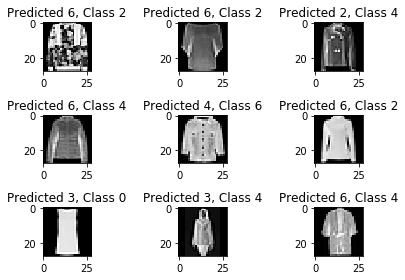

In [123]:
for i, incor in enumerate(incorrect[0:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[incor].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title('Predicted {}, Class {}'.format(predicted_classes[incor], y_true[incor]))
    plt.tight_layout()

It looks like diversity of the similar patterns present on multiple classes effect the performance of the classifier although CNN is a robust architechture. A jacket, a shirt, and a long-sleeve blouse has similar patterns: long sleeves (or not!), buttons (or not!), and so on.

### What do the activations look like?
The snippets are taken from Chollet, F (2017). The idea is the give an input data and visualize the activations of the conv layers.

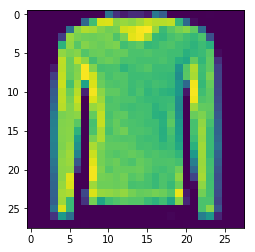

In [124]:
test_im = X_train[154]
plt.imshow(test_im.reshape(28, 28), cmap='viridis', interpolation='none')
plt.show()

Let's see the activation of the 2nd channel of the first layer

In [126]:
from keras import models

In [135]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(input=model.input, output=layer_outputs)
activations = activation_model.predict(test_im.reshape(1, 28, 28, 1))

/home/admin/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


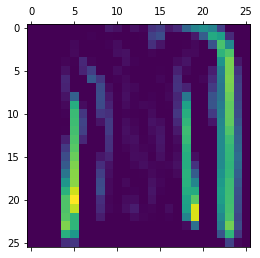

In [136]:
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')